# 1. Queries from the database using SQL

In [97]:
import sqlite3 as sq #handle sql databases
import pandas as pd #dataframes
import numpy as np #deal with arrays
import matplotlib.pyplot as plt #plotting
from matplotlib import rcParams
import seaborn as sns

#to show plots in line
%matplotlib inline 

In [98]:
#Connect to my database
con = sq.connect('Database_Juan.db')

In [99]:
try2 = con.execute("SELECT dat.Filename as fn FROM Info as dat")
for row in try2: 
    print row

(u'Z-ADP.2017-01-18T11:58:36.905.fits',)
(u'J-ADP.2017-01-18T11:58:35.781.fits',)
(u'H-ADP.2017-01-18T11:58:35.780.fits',)
(u'Ks-ADP.2016-05-25T15:33:39.546.fits',)
(u'Ks-ADP.2017-01-18T11:58:39.907.fits',)
(u'Ks-ADP.2016-05-25T15:33:43.377.fits',)
(u'Y-ADP.2017-01-18T11:58:36.901.fits',)
(u'Z-ADP.2017-01-18T11:58:36.905b.fits',)
(u'J-ADP.2017-01-18T11:58:35.781b.fits',)
(u'H-ADP.2017-01-18T11:58:35.780b.fits',)
(u'Ks-ADP.2016-05-25T15:33:39.546b.fits',)
(u'Y-ADP.2017-01-18T11:58:36.901b.fits',)
(u'Z-ADP.2017-01-18T11:58:36.905c.fits',)
(u'J-ADP.2017-01-18T11:58:35.781c.fits',)
(u'H-ADP.2017-01-18T11:58:35.780c.fits',)
(u'Ks-ADP.2016-05-25T15:33:39.546c.fits',)
(u'Ks-ADP.2017-01-18T11:58:39.907c.fits',)
(u'Y-ADP.2017-01-18T11:58:36.901c.fits',)


In [100]:
# Now let's do the requested queries:

In [101]:
#a.1 Find all images observed between MJD=56800 and MJD=57300 and give me the number of stars detected with 
# S/N > 5 in each image

R1_que = """SELECT filename, mjd, numstars FROM (SELECT inf.Filename as filename, inf.MJD mjd, COUNT(dat.StarID) 
        as numstars FROM Info as inf, All_data as dat WHERE dat.ID == inf.ID AND dat.SN > 5
        AND dat.Class=-1 GROUP BY inf.Filename) WHERE mjd>56800 AND mjd<57300 ORDER BY mjd"""

# Execute query
R1 = con.execute(R1_que)

# Show information to see if the query is correct.
for row in R1: 
    print "File_name: {0}.    MJD: {1}.    Number_of_Stars: {2}.".format(row[0], row[1], row[2])

File_name: Ks-ADP.2016-05-25T15:33:43.377.fits.    MJD: 56829.0390512.    Number_of_Stars: 7888.
File_name: H-ADP.2017-01-18T11:58:35.780.fits.    MJD: 57257.044108.    Number_of_Stars: 7982.
File_name: J-ADP.2017-01-18T11:58:35.781.fits.    MJD: 57257.0504323.    Number_of_Stars: 7022.
File_name: H-ADP.2017-01-18T11:58:35.780b.fits.    MJD: 57258.044108.    Number_of_Stars: 7725.
File_name: H-ADP.2017-01-18T11:58:35.780c.fits.    MJD: 57258.044108.    Number_of_Stars: 8022.
File_name: J-ADP.2017-01-18T11:58:35.781b.fits.    MJD: 57258.0504323.    Number_of_Stars: 7354.
File_name: J-ADP.2017-01-18T11:58:35.781c.fits.    MJD: 57258.0504323.    Number_of_Stars: 7248.
File_name: Y-ADP.2017-01-18T11:58:36.901.fits.    MJD: 57267.1596647.    Number_of_Stars: 6806.
File_name: Z-ADP.2017-01-18T11:58:36.905.fits.    MJD: 57267.1671072.    Number_of_Stars: 6477.
File_name: Y-ADP.2017-01-18T11:58:36.901b.fits.    MJD: 57268.1596647.    Number_of_Stars: 7215.
File_name: Y-ADP.2017-01-18T11:58:36.

In [102]:
#a.2 Find the objects that have J-H > 1.5

#For this query we use the table that we created in the database that contains the colours of the stars.

R2_que = """SELECT Colours.JH_colour, Colours.FieldID From Colours WHERE Colours.JH_colour > 1.5"""

#Since we need to use the data, we need to connect to it with SQL like this:
R2 = pd.read_sql_query(R2_que, con)

print 'Number of objects that have JH>1.5 =', len(R2.JH_colour)

Number of objects that have JH>1.5 = 7154


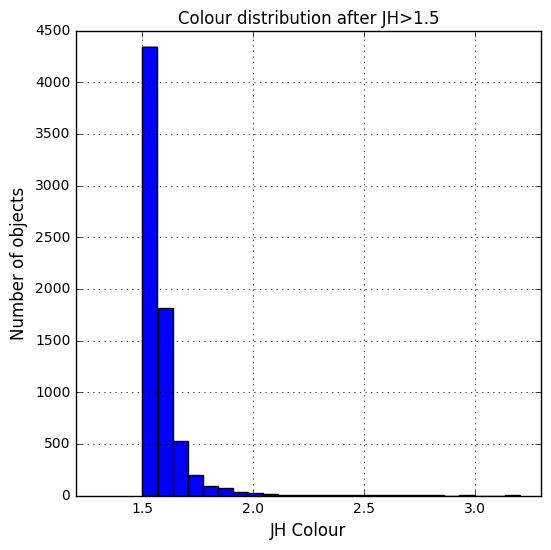

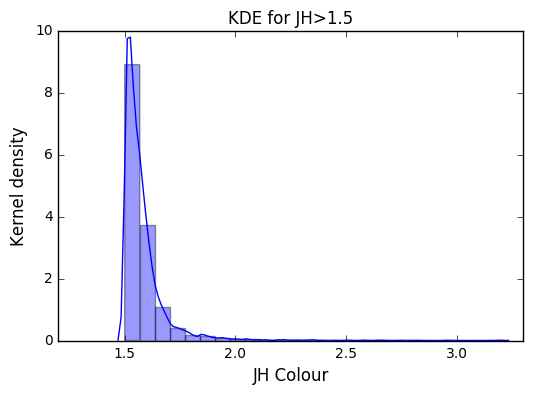

In [103]:
# Since there are more than 20 results in this query, I will display them graphically. The best way to do so is 
# a histogram because it shows the distribution of colour for the 7154 objects after the value of 1.5

# Plot the histogram with 25 bins and define a range that allows to see the data distribution    

R2.hist(column='JH_colour', bins=25, figsize=(6,6))
plt.xlim(1.2,3.3)
plt.title('Colour distribution after JH>1.5')
plt.ylabel("Number of objects".format(25), size=12)
plt.xlabel("JH Colour", size=12)
plt.show()

# Let's shot the Kernel density estimation for this histogram:

sns.distplot(R2.JH_colour.values, bins=25, color="b")
plt.xlim(1.2,3.3)
plt.title('KDE for JH>1.5')
plt.ylabel("Kernel density".format(25), size=12)
plt.xlabel("JH Colour", size=12)

In [104]:
#a.3 Find the objects where Ks differs by more than 20 times the flux uncertainty from the mean flux



In [105]:
#a.4 Find all catalogues that exist for a given field

# I have only 3 fields so my for loop goes from 1 to 4
for element in range (1, 4):

    R4_que_loop = """ SELECT fieldid, filename, realfilename, ident FROM (SELECT inf.Filename as filename, 
        inf.Real_name as realfilename, inf.FieldID as fieldid, inf.ID as ident FROM Info as inf) 
        WHERE fieldid == {}""".format(element)

    R4_loop = con.execute(R4_que_loop)

    print "Field {}".format(element)  # Print the name of the field
    for row in R4_loop:
        print "Filename: {0}.    ID: {1}".format(row[1], row[3])   # Print the name of the file and the ID

Field 1
Filename: Z-ADP.2017-01-18T11:58:36.905.fits.    ID: 1
Filename: J-ADP.2017-01-18T11:58:35.781.fits.    ID: 2
Filename: H-ADP.2017-01-18T11:58:35.780.fits.    ID: 3
Filename: Ks-ADP.2016-05-25T15:33:39.546.fits.    ID: 4
Filename: Ks-ADP.2017-01-18T11:58:39.907.fits.    ID: 5
Filename: Ks-ADP.2016-05-25T15:33:43.377.fits.    ID: 6
Filename: Y-ADP.2017-01-18T11:58:36.901.fits.    ID: 7
Field 2
Filename: Z-ADP.2017-01-18T11:58:36.905b.fits.    ID: 8
Filename: J-ADP.2017-01-18T11:58:35.781b.fits.    ID: 9
Filename: H-ADP.2017-01-18T11:58:35.780b.fits.    ID: 10
Filename: Ks-ADP.2016-05-25T15:33:39.546b.fits.    ID: 11
Filename: Y-ADP.2017-01-18T11:58:36.901b.fits.    ID: 12
Field 3
Filename: Z-ADP.2017-01-18T11:58:36.905c.fits.    ID: 13
Filename: J-ADP.2017-01-18T11:58:35.781c.fits.    ID: 14
Filename: H-ADP.2017-01-18T11:58:35.780c.fits.    ID: 15
Filename: Ks-ADP.2016-05-25T15:33:39.546c.fits.    ID: 16
Filename: Ks-ADP.2017-01-18T11:58:39.907c.fits.    ID: 17
Filename: Y-ADP.2

In [106]:
#a.5 For a given image I would like to retrieve the Y,Z,J,H and Ks magnitudes for all stars with S/N > 30 in
# Y,Z,J,H and Ks

# Write string for query. In this case, I choose field_number 1 and make the filtering according
#to S/N >30

field_number_R5 = 1

R5_que_filtering = """
        SELECT inf.ID as ident, inf.FieldID as fieldident, inf.Filter as filterident,
        dat.Mag1 as magnitude1, dat.StarID as starident FROM info as inf, All_data as dat
        WHERE inf.FieldID == {} AND dat.Class=-1 AND inf.ID == dat.ID AND dat.SN > 30 ORDER BY ident
        """.format(field_number_R5)
# Execute query
R5_filtering = con.execute(R5_que_filtering)

# Since I need to use the data, I create a panda data frame with it:
R5_filtering_df = pd.read_sql_query(R5_que_filtering, con)
Ks  = R5_filtering_df[R5_filtering_df.filterident=="Ks"]

# And now select for all the filters using the defined filter:
Y   = R5_filtering_df[(R5_filtering_df.filterident == "Y")].magnitude1.values
Z   = R5_filtering_df[(R5_filtering_df.filterident == "Z")].magnitude1.values
J   = R5_filtering_df[(R5_filtering_df.filterident == "J")].magnitude1.values
H   = R5_filtering_df[(R5_filtering_df.filterident == "H")].magnitude1.values
Ks4 = Ks[Ks.ident==4].magnitude1.values
Ks5 = Ks[Ks.ident==5].magnitude1.values
Ks6 = Ks[Ks.ident==6].magnitude1.values

# Check the number of stars that match the criterium of S/N > 30:
print 'Stars with SN>30 in total:', len(R5_filtering_df.magnitude1)
print 'Stars with SN>30 in Y:', len(R5_filtering_df[(R5_filtering_df.filterident == "Y")].magnitude1.values)
print 'Stars with SN>30 in Z:', len(R5_filtering_df[(R5_filtering_df.filterident == "Z")].magnitude1.values)
print 'Stars with SN>30 in J:', len(R5_filtering_df[(R5_filtering_df.filterident == "J")].magnitude1.values)
print 'Stars with SN>30 in H:', len(R5_filtering_df[(R5_filtering_df.filterident == "H")].magnitude1.values)
print 'Stars with SN>30 in Ks4:', len(Ks4)
print 'Stars with SN>30 in Ks5:', len(Ks5)
print 'Stars with SN>30 in Ks6:', len(Ks6)

Stars with SN>30 in total: 34529
Stars with SN>30 in Y: 4218
Stars with SN>30 in Z: 3740
Stars with SN>30 in J: 4829
Stars with SN>30 in H: 6356
Stars with SN>30 in Ks4: 4616
Stars with SN>30 in Ks5: 4196
Stars with SN>30 in Ks6: 6574


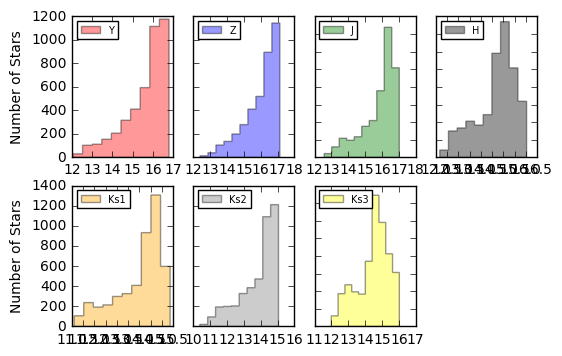

In [107]:
# We see that in all the cases, there is a big number of stars that match the criteria so it's good to show them 
# graphically:

#Plot easily for Y, Z, J, H
fig, axs = plt.subplots(2,4)
ax = axs.ravel()
fig.figsize=(800, 60)

#fig.title('Distribution of stars for each filter')

ax[0].set_ylabel('Number of Stars')
ax[0].hist(Y, histtype='stepfilled', color='red', alpha=0.4, label='Y')
#ax[0].set_xticklabels([])
ax[0].legend(prop={'size': 7}, loc=2)

ax[1].hist(Z, histtype='stepfilled', color='blue', alpha=0.4, label='Z')
ax[1].set_yticklabels([])
#ax[1].set_xticklabels([])
ax[1].legend(prop={'size': 7}, loc=2)

ax[2].hist(J, histtype='stepfilled', color='green', alpha=0.4, label='J')
ax[2].set_yticklabels([])
#ax[2].set_xticklabels([])
ax[2].legend(prop={'size': 7}, loc=2)

ax[3].hist(H, histtype='stepfilled', color='black', alpha=0.4, label='H')
#ax[3].set_xticklabels([])
ax[3].set_yticklabels([])
ax[3].legend(prop={'size': 7}, loc=2)

ax[4].hist(Ks[Ks.ident==4].magnitude1.values, histtype='stepfilled', color='orange', alpha=0.4, label='Ks1')
#ax[4].set_xticklabels([])
ax[4].set_ylabel('Number of Stars')
#ax[4].set_yticklabels([])
ax[4].legend(prop={'size': 7}, loc=2)

ax[5].hist(Ks5, histtype='stepfilled', color='grey', alpha=0.4, label='Ks2')
ax[5].set_yticklabels([])
#ax[5].set_xticklabels([])
ax[5].legend(prop={'size': 7}, loc=2)

ax[6].hist(Ks6, histtype='stepfilled', color='yellow', alpha=0.4, label='Ks3')
ax[6].set_yticklabels([])
#ax[6].set_xticklabels([])
ax[6].legend(prop={'size': 7}, loc=2)

ax[7].hist(Ks6, histtype='stepfilled', color='white', alpha=0.4, label='', edgecolor='none')
ax[7].set_yticklabels([])
ax[7].set_xticklabels([])
ax[7].spines['top'].set_visible(False)
ax[7].spines['right'].set_visible(False)
ax[7].spines['bottom'].set_visible(False)
ax[7].spines['left'].set_visible(False)
ax[7].get_xaxis().set_ticks([])
ax[7].get_yaxis().set_ticks([])
ax[7].legend()

plt.show()

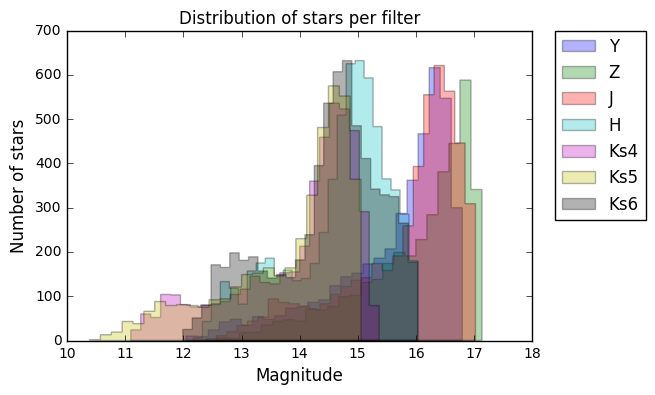

In [108]:
# Another way to visualize the data is using a histogram for all the filters:

plt.hist(Y,histtype='stepfilled', bins=25, label='Y', alpha=0.3)
plt.hist(Z,histtype='stepfilled', bins=25, label='Z', alpha=0.3)
plt.hist(J,histtype='stepfilled', bins=25, label='J', alpha=0.3)
plt.hist(H,histtype='stepfilled', bins=25, label='H', alpha=0.3)
plt.hist(Ks4,histtype='stepfilled', bins=25, label='Ks4', alpha=0.3)
plt.hist(Ks5,histtype='stepfilled', bins=25, label='Ks5', alpha=0.3)
plt.hist(Ks6,histtype='stepfilled', bins=25, label='Ks6', alpha=0.3)
plt.title('Distribution of stars per filter')
plt.ylabel("Number of stars".format(25), size=12)
plt.xlabel("Magnitude", size=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()